In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.modeling.models import Voigt1D
from astropy.modeling import fitting
import seaborn as sns
from lmfit import Model, Parameters

In [2]:
def wavelength_edges(wavelength_data):
    diff = np.diff(wavelength_data)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) 
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) 
    w0 = wavelength_data - diff0/2.
    w1 = wavelength_data + diff1/2.

    return w0, w1

In [3]:
# Define a fitting function that returns the model's values
def single_voigt_fit(x, amplitude, x_0, fwhm_L, fwhm_G):
    voigt_model.amplitude_L = amplitude
    voigt_model.x_0 = x_0
    voigt_model.fwhm_L = fwhm_L
    voigt_model.fwhm_G = fwhm_G
    return voigt_model(x)

In [4]:
# Define a fitting function that returns the model's values
def multiple_voigt_fit(x, **params):
    y = np.zeros_like(x)
    for i in range(2):
        amplitude = params[f'amplitude_{i}']
        x_0 = params[f'x_0_{i}']
        fwhm_L = params[f'fwhm_L_{i}']
        fwhm_G = params[f'fwhm_G_{i}']
        voigt_model.amplitude_L = amplitude
        voigt_model.x_0 = x_0
        voigt_model.fwhm_L = fwhm_L
        voigt_model.fwhm_G = fwhm_G
        y += voigt_model(x)
    return y

In [5]:
data = fits.getdata('of0e53010_test_new_x1d.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) # change if the spectra starts at a different wavelength
hd_wavelength_data, hd_flux_data, hd_error_data = w[mask], f[mask], e[mask]

In [6]:
# Load data from fluxpal
hd191939_table = Table.read('hd-191939.ecsv', format='ascii.ecsv')
hd191939_df = hd191939_table.to_pandas()
hd191939_df

,Ion,Rest Wavelength,Flux,Error,Blended Line
0,C III,1176.372,7.999070e-16,2.750151e-16,True
1,Si III,1206.499,-7.143874e-16,0.000000e+00,False
2,Si III,1303.323,-7.919437e-16,0.000000e+00,True
3,O V,1218.390,-3.329361e-15,0.000000e+00,False
4,O V,1371.292,-2.992557e-16,0.000000e+00,False
5,N V,1242.804,-3.968238e-16,0.000000e+00,True
6,S II,1259.519,-3.444762e-16,0.000000e+00,True
7,Si II,1265.001,-3.199288e-16,0.000000e+00,True
8,Si II,1304.369,-7.420895e-16,0.000000e+00,False
9,Si II,1533.430,-5.950202e-16,0.000000e+00,True


In [7]:
data = fits.getdata('hlsp_muscles_hst_stis_tau_ceti_e140m_v1_component-spec.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) # change if the spectra starts at a different wavelength
tc_wavelength_data, tc_flux_data, tc_error_data = w[mask], f[mask], e[mask]

In [8]:
# Load data from fluxpal
tc_table = Table.read('tau-ceti.ecsv', format='ascii.ecsv')
tc_df = tc_table.to_pandas()
tc_df

,Ion,Rest Wavelength,Flux,Error,Blended Line
0,C III,1176.372,1.467025e-14,1.179191e-15,True
1,Si III,1206.499,3.085698e-14,8.772685e-16,False
2,Si III,1303.323,-1.681547e-15,0.000000e+00,True
3,O V,1218.390,1.113160e-14,7.765193e-16,False
4,O V,1371.292,-3.626990e-16,0.000000e+00,False
5,N V,1242.804,5.408060e-15,3.780635e-16,True
6,S II,1259.519,-9.326317e-16,0.000000e+00,True
7,Si II,1265.001,1.167004e-14,4.028759e-16,True
8,Si II,1304.369,-1.664752e-15,0.000000e+00,False
9,Si II,1533.430,2.195836e-14,7.400745e-16,True


## CII

#### Tau Ceti

In [9]:
peak_width = 0.5
wavelength_1 = 1334.5
wavelength_2 = 1335.5
wavelength_mask = (tc_wavelength_data > wavelength_1 - peak_width) & (tc_wavelength_data < wavelength_2 + peak_width) 

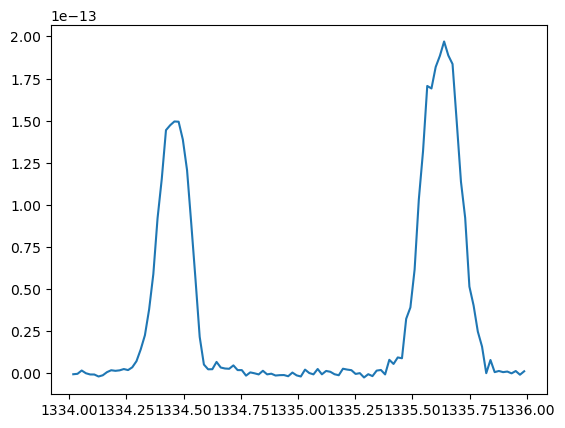

In [10]:
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask])
plt.show()

Parameters([('amplitude_0', <Parameter 'amplitude_0', value=1.9704372033347695e-13, bounds=[-inf:inf]>), ('x_0_0', <Parameter 'x_0_0', value=1334.5, bounds=[-inf:inf]>), ('fwhm_L_0', <Parameter 'fwhm_L_0', value=0.2, bounds=[-inf:inf]>), ('fwhm_G_0', <Parameter 'fwhm_G_0', value=0.2, bounds=[-inf:inf]>), ('amplitude_1', <Parameter 'amplitude_1', value=1.9704372033347695e-13, bounds=[-inf:inf]>), ('x_0_1', <Parameter 'x_0_1', value=1335.5, bounds=[-inf:inf]>), ('fwhm_L_1', <Parameter 'fwhm_L_1', value=0.2, bounds=[-inf:inf]>), ('fwhm_G_1', <Parameter 'fwhm_G_1', value=0.2, bounds=[-inf:inf]>)])
[[Model]]
    Model(multiple_voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12571
    # data points      = 108
    # variables        = 8
    chi-square         = 2.9373e-27
    reduced chi-square = 2.9373e-29
    Akaike info crit   = -7087.64053
    Bayesian info crit = -7066.18348
    R-squared          = 1.00000000
[[Variables]]
    amplitude_0:  9.1577

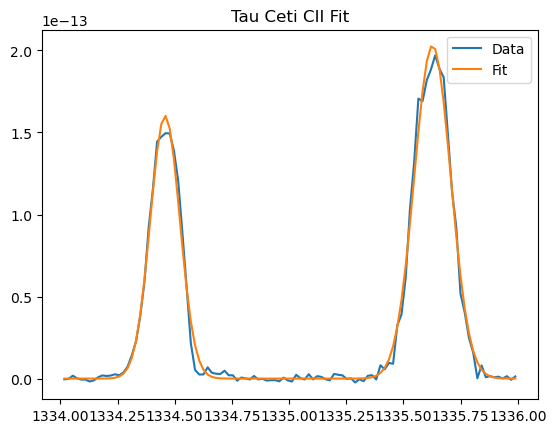

In [11]:
voigt_model = Voigt1D()
lmfit_model = Model(multiple_voigt_fit)

# Set initial parameter values
num_peaks = 2 
params = Parameters()
init_amp = np.max(tc_flux_data[wavelength_mask]) 
init_x0 = wavelength_1
init_fwhm_g = 0.2
init_fwhm_l = 0.2
params.add(f'amplitude_{0}', value=init_amp)
params.add(f'x_0_{0}', value=init_x0)
params.add(f'fwhm_L_{0}', value=init_fwhm_l)
params.add(f'fwhm_G_{0}', value=init_fwhm_g)
params.add(f'amplitude_{1}', value=init_amp)
params.add(f'x_0_{1}', value=wavelength_2)
params.add(f'fwhm_L_{1}', value=init_fwhm_l)
params.add(f'fwhm_G_{1}', value=init_fwhm_g)

print(params)
    
# Fit the model to the data
result = lmfit_model.fit(tc_flux_data[wavelength_mask], params=params, x=tc_wavelength_data[wavelength_mask])

# Print fit report
print(result.fit_report())

# Plot the results
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask], label='Data')
plt.plot(tc_wavelength_data[wavelength_mask], result.best_fit, label='Fit')
plt.title('Tau Ceti CII Fit')
plt.legend()
plt.show()


In [12]:
# Integrate under the line
w0,w1 = wavelength_edges(tc_wavelength_data[wavelength_mask])
tc_voigt = result.best_fit
continuum = [min(tc_voigt) for _ in range(len(tc_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(tc_voigt*(w1-w0)) 

continuum_sumflux = np.sum(continuum*(w1-w0))
tc_total_flux = total_sumflux - continuum_sumflux
print(f'Tau Ceti CII Flux: {tc_total_flux}')

Tau Ceti CII Flux: 6.64803695686393e-14


#### HD-191939

In [13]:
peak_width = 5
wavelength_1 = 1334
wavelength_2 = 1336
wavelength_mask = (hd_wavelength_data > wavelength_1 - peak_width) & (hd_wavelength_data < wavelength_2 + peak_width) 

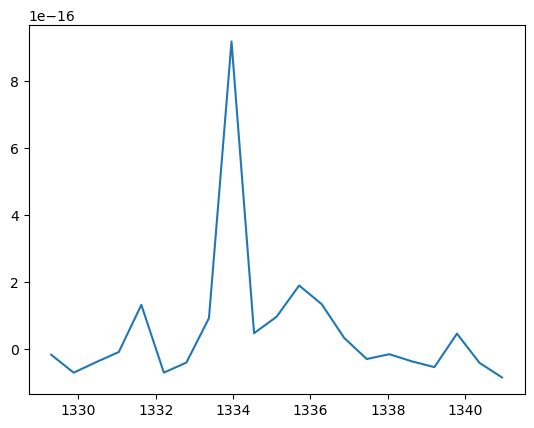

In [14]:
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask])
plt.show()

Parameters([('amplitude_0', <Parameter 'amplitude_0', value=9.180386e-16, bounds=[-inf:inf]>), ('x_0_0', <Parameter 'x_0_0', value=1334, bounds=[-inf:inf]>), ('fwhm_L_0', <Parameter 'fwhm_L_0', value=0.2, bounds=[-inf:inf]>), ('fwhm_G_0', <Parameter 'fwhm_G_0', value=0.2, bounds=[-inf:inf]>), ('amplitude_1', <Parameter 'amplitude_1', value=9.180386e-16, bounds=[-inf:inf]>), ('x_0_1', <Parameter 'x_0_1', value=1336, bounds=[-inf:inf]>), ('fwhm_L_1', <Parameter 'fwhm_L_1', value=0.2, bounds=[-inf:inf]>), ('fwhm_G_1', <Parameter 'fwhm_G_1', value=0.2, bounds=[-inf:inf]>)])
[[Model]]
    Model(multiple_voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 21
    # variables        = 8
    chi-square         = 5.9166e-32
    reduced chi-square = 4.5512e-33
    Akaike info crit   = -1557.93925
    Bayesian info crit = -1549.58307
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    amplitude_0

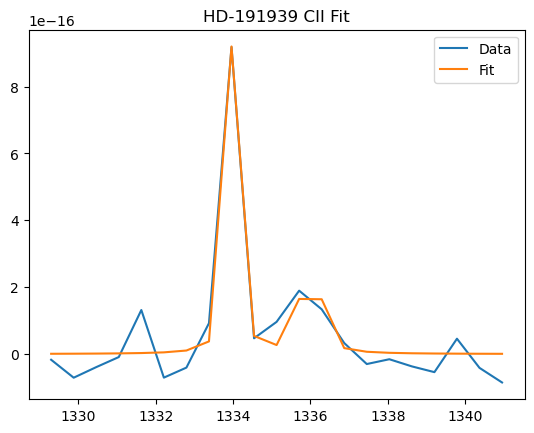

In [15]:
voigt_model = Voigt1D()
lmfit_model = Model(multiple_voigt_fit)

# Set initial parameter values
num_peaks = 2 
params = Parameters()
init_amp = np.max(hd_flux_data[wavelength_mask]) 
init_x0 = wavelength_1
init_fwhm_g = 0.2
init_fwhm_l = 0.2
params.add(f'amplitude_{0}', value=init_amp)
params.add(f'x_0_{0}', value=init_x0)
params.add(f'fwhm_L_{0}', value=init_fwhm_l)
params.add(f'fwhm_G_{0}', value=init_fwhm_g)
params.add(f'amplitude_{1}', value=init_amp)
params.add(f'x_0_{1}', value=wavelength_2)
params.add(f'fwhm_L_{1}', value=init_fwhm_l)
params.add(f'fwhm_G_{1}', value=init_fwhm_g)

print(params)
    
# Fit the model to the data
result = lmfit_model.fit(hd_flux_data[wavelength_mask], params=params, x=hd_wavelength_data[wavelength_mask])

# Print fit report
print(result.fit_report())

# Plot the results
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask], label='Data')
plt.plot(hd_wavelength_data[wavelength_mask], result.best_fit, label='Fit')
plt.title('HD-191939 CII Fit')
plt.legend()
plt.show()


In [16]:
# Integrate under the line
w0,w1 = wavelength_edges(hd_wavelength_data[wavelength_mask])
hd_voigt = result.best_fit
continuum = [min(hd_voigt) for _ in range(len(hd_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(hd_voigt*(w1-w0)) 

continuum_sumflux = np.sum(continuum*(w1-w0))
hd_total_flux = total_sumflux - continuum_sumflux
print(f'HD-191939 Flux: {hd_total_flux}')

HD-191939 Flux: 8.23134917063394e-16


#### Comparison

In [17]:
print(f"Ratio T-H: {tc_total_flux/hd_total_flux}")

Ratio T-H: 80.7648517764425


## Fe XXI

#### Tau Ceti

In [29]:
peak_width = 0.5
wavelength_1 = 1354.080	
wavelength_2 = 1354.080
wavelength_mask = (tc_wavelength_data > wavelength_1 - peak_width) & (tc_wavelength_data < wavelength_2 + peak_width) 

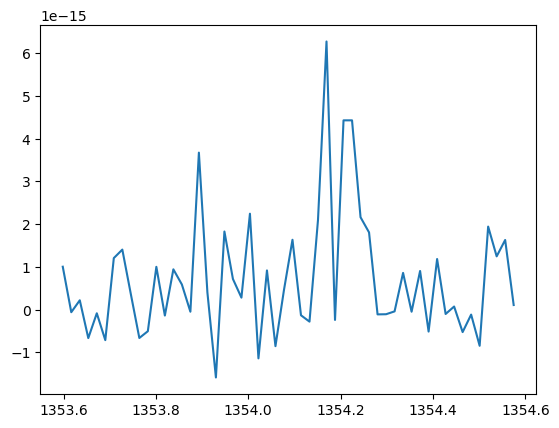

In [30]:
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask])
plt.show()

[[Model]]
    Model(single_voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 104
    # data points      = 54
    # variables        = 4
    chi-square         = 8.1741e-29
    reduced chi-square = 1.6348e-30
    Akaike info crit   = -3699.80126
    Bayesian info crit = -3691.84532
    R-squared          = 1.00000000
[[Variables]]
    amplitude:  6.1169e-15 +/- 8.6163e-15 (140.86%) (init = 6.278002e-15)
    x_0:        1354.20144 +/- 0.01133124 (0.00%) (init = 1354.08)
    fwhm_L:     0.05325441 +/- 0.08838843 (165.97%) (init = 0.2)
    fwhm_G:     0.07152758 +/- 0.08856407 (123.82%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, fwhm_L) = -0.9909
    C(amplitude, fwhm_G) = +0.9396
    C(fwhm_L, fwhm_G)    = -0.9221


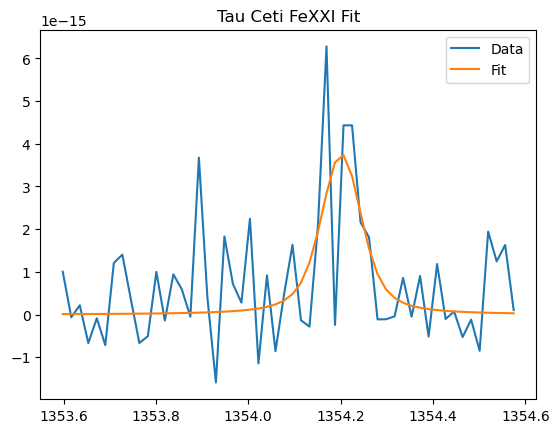

In [31]:
voigt_model = Voigt1D()
lmfit_model = Model(single_voigt_fit)

# Set initial parameter values
init_amp = np.max(tc_flux_data[wavelength_mask]) 
init_x0 = wavelength_1
init_fwhm_g = 0.2
init_fwhm_l = 0.2

params_single = lmfit_model.make_params(amplitude=init_amp, x_0=init_x0, fwhm_L=init_fwhm_l, fwhm_G=init_fwhm_g)
    
# Fit the model to the data
result = lmfit_model.fit(tc_flux_data[wavelength_mask], params=params_single, x=tc_wavelength_data[wavelength_mask])

# Print fit report
print(result.fit_report())

# Plot the results
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask], label='Data')
plt.plot(tc_wavelength_data[wavelength_mask], result.best_fit, label='Fit')
plt.title('Tau Ceti FeXXI Fit')
plt.legend()
plt.show()


In [32]:
tc_flux_data[wavelength_mask]

array([ 1.00473238e-15, -6.04584098e-17,  2.18816330e-16, -6.66149896e-16,
       -8.56116780e-17, -7.14428885e-16,  1.20674257e-15,  1.40538449e-15,
        3.64410112e-16, -6.63943891e-16, -5.05417316e-16,  1.00197940e-15,
       -1.39022201e-16,  9.43647177e-16,  5.88644028e-16, -4.90900585e-17,
        3.67588141e-15,  4.02572865e-16, -1.58847097e-15,  1.82878517e-15,
        7.17747594e-16,  2.80781142e-16,  2.24591720e-15, -1.14119828e-15,
        9.17578980e-16, -8.55298799e-16,  4.59752971e-16,  1.63539526e-15,
       -1.32226431e-16, -2.80937195e-16,  2.10190275e-15,  6.27800233e-15,
       -2.41139234e-16,  4.43155113e-15,  4.43176109e-15,  2.16305068e-15,
        1.80818356e-15, -1.11232772e-16, -1.07856002e-16, -4.10554338e-17,
        8.60144565e-16, -4.90448086e-17,  9.05370283e-16, -5.13660220e-16,
        1.18482546e-15, -1.02015858e-16,  7.25498983e-17, -5.25777082e-16,
       -1.16382745e-16, -8.46275712e-16,  1.94463165e-15,  1.24747553e-15,
        1.63089422e-15,  

In [36]:
# Integrate under the line
w0,w1 = wavelength_edges(tc_wavelength_data[wavelength_mask])
tc_voigt = result.best_fit
continuum = [min(tc_voigt) for _ in range(len(tc_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(tc_flux_data[wavelength_mask]*(w1-w0)) # maybe replace with tc_flux_data[wavelength_mask]

continuum_sumflux = np.sum(continuum*(w1-w0))
tc_total_flux = total_sumflux - continuum_sumflux
print(f'Tau Ceti CII Flux: {tc_total_flux}')

Tau Ceti CII Flux: 6.978027299164912e-16


#### HD-191939

In [23]:
peak_width = 5
wavelength_1 = 1354.080	
wavelength_2 = 1354.080	
wavelength_mask = (hd_wavelength_data > wavelength_1 - peak_width) & (hd_wavelength_data < wavelength_2 + peak_width) 

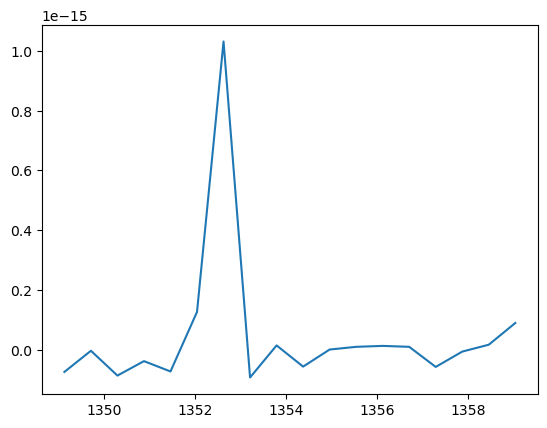

In [24]:
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask])
plt.show()

[[Model]]
    Model(single_voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3876
    # data points      = 18
    # variables        = 4
    chi-square         = 1.1193e-30
    reduced chi-square = 7.9947e-32
    Akaike info crit   = -1285.39469
    Bayesian info crit = -1281.83321
    R-squared          = 1.00000000
[[Variables]]
    amplitude:  7.2369e-16 +/- 1.0717e-12 (148083.15%) (init = 1.030697e-15)
    x_0:        1353.90212 +/- 5.27004552 (0.39%) (init = 1354.08)
    fwhm_L:     0.21223370 +/- 160.317779 (75538.32%) (init = 0.2)
    fwhm_G:    -0.11901709 +/- 51.8766732 (43587.58%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, fwhm_G) = +1.0000
    C(amplitude, fwhm_L) = -1.0000
    C(fwhm_L, fwhm_G)    = -1.0000
    C(x_0, fwhm_G)       = -0.8829
    C(amplitude, x_0)    = -0.8811
    C(x_0, fwhm_L)       = +0.8785


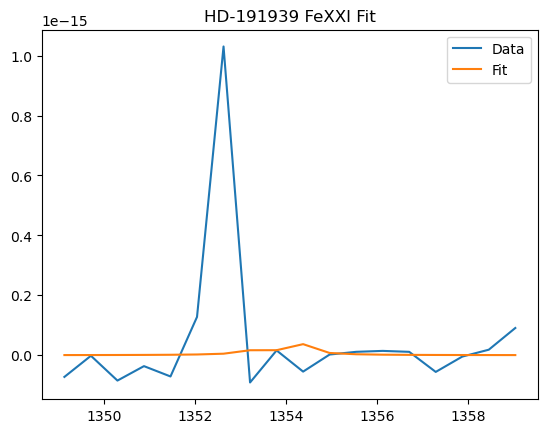

In [25]:
voigt_model = Voigt1D()
lmfit_model = Model(single_voigt_fit)

# Set initial parameter values
init_amp = np.max(hd_flux_data[wavelength_mask]) 
init_x0 = wavelength_1
init_fwhm_g = 0.2
init_fwhm_l = 0.2

params_single = lmfit_model.make_params(amplitude=init_amp, x_0=init_x0, fwhm_L=init_fwhm_l, fwhm_G=init_fwhm_g)
    
# Fit the model to the data
result = lmfit_model.fit(hd_flux_data[wavelength_mask], params=params_single, x=hd_wavelength_data[wavelength_mask])

# Print fit report
print(result.fit_report())

# Plot the results
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask], label='Data')
plt.plot(hd_wavelength_data[wavelength_mask], result.best_fit, label='Fit')
plt.title('HD-191939 FeXXI Fit')
plt.legend()
plt.show()


In [26]:
# Integrate under the line
w0,w1 = wavelength_edges(hd_wavelength_data[wavelength_mask])
hd_voigt = result.best_fit
continuum = [min(hd_voigt) for _ in range(len(hd_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(hd_flux_data[wavelength_mask]*(w1-w0)) # maybe replace with tc_flux_data[wavelength_mask]

continuum_sumflux = np.sum(continuum*(w1-w0))
hd_total_flux = total_sumflux - continuum_sumflux
print(f'HD-191939 FeXXI Flux: {hd_total_flux}')

HD-191939 FeXXI Flux: 4.915471555710432e-16


#### Comparison

In [37]:
print(f"Ratio T-H: {tc_total_flux/hd_total_flux}")

Ratio T-H: 1.419604857861166


In [38]:
print(f"Ratio T-H: {(1.467025e-14)/(7.999070e-16)}")

Ratio T-H: 18.339944518550283
